In [1]:
pip install pandana

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandana.loaders import osm
import warnings
import pandana
import pandas as pd
warnings.filterwarnings('ignore')

In [3]:
import geopandas

In [4]:
print(geopandas.__version__)
print(pandana.__version__)

0.14.4
0.7


In [5]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import networkx as nx
import osmnx as ox
import geopandas
!pip install folium
import folium
import contextily as cx

# City boundary

In [9]:
NY = ox.geocode_to_gdf('New York City, New York, USA')

In [10]:
NY

geometry  bbox_north  bbox_south  \
0  MULTIPOLYGON (((-74.25884 40.49887, -74.25814 ...    40.91763   40.476578   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat        lon  \
0 -73.700233 -74.258843  371663561  relation  175905  40.712728 -74.006015   

      class            type  place_rank  importance addresstype      name  \
0  boundary  administrative          10    0.817577        city  New York   

              display_name  
0  New York, United States

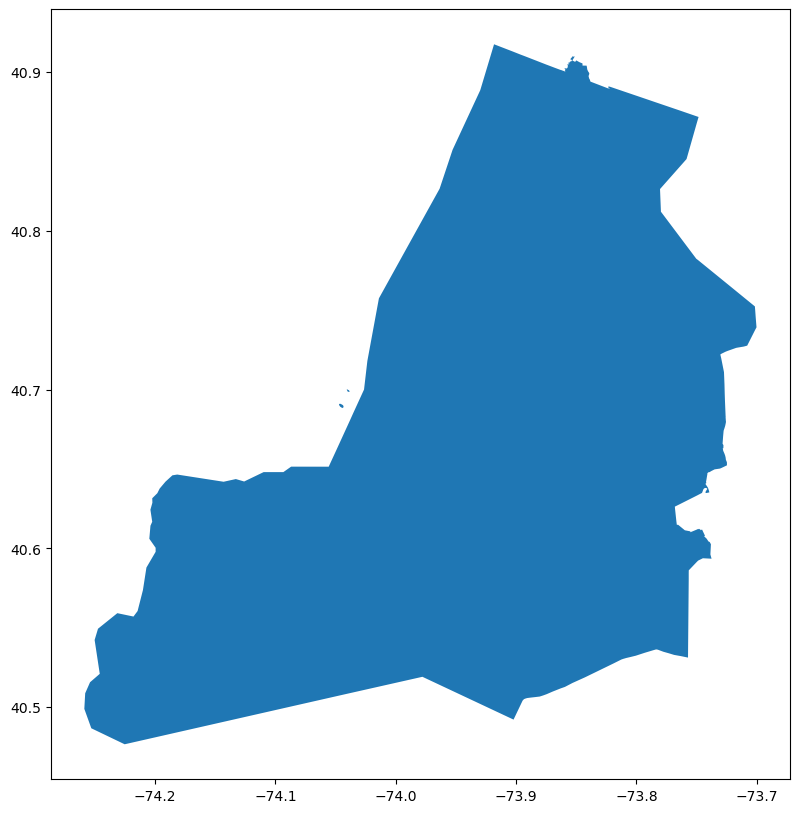

In [11]:
import osmnx as ox
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
NY.plot(ax=ax)
plt.show()

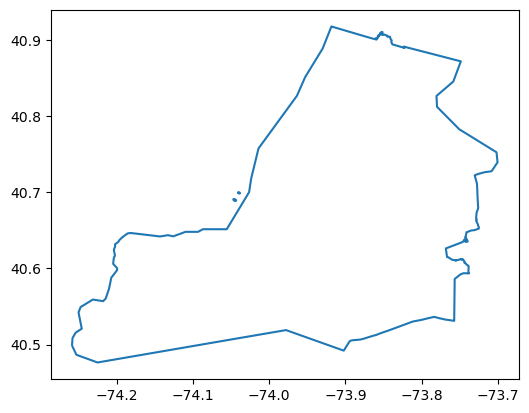

In [9]:
ax = NY.boundary.plot()
ax.set_aspect('equal')

In [6]:
G1 = ox.graph_from_place("New York City, New York, USA", network_type="drive",simplify=True)

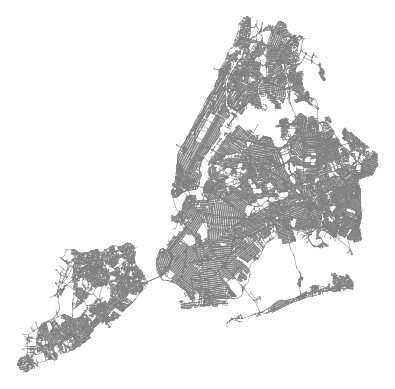

In [12]:
# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the graph
ox.plot_graph(G1, ax=ax, node_size=0.5, bgcolor='white', node_color='gray', edge_color="gray", edge_linewidth=0.2)

# Set labels for x-axis and y-axis
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

In [13]:
pip install --upgrade osmnx


  Using cached osmnx-1.9.3-py3-none-any.whl.metadata (4.8 kB)
Using cached osmnx-1.9.3-py3-none-any.whl (107 kB)
  Attempting uninstall: osmnx
    Found existing installation: osmnx 1.9.1
    Uninstalling osmnx-1.9.1:
      Successfully uninstalled osmnx-1.9.1


In [14]:
ox.convert.to_digraph(G1, weight='length')

AttributeError: module 'osmnx' has no attribute 'convert'

In [16]:
node_centrality = nx.closeness_centrality(G1)

In [17]:
node_centrality

{39076461: 0.017344849064930733,
 39076490: 0.015265234439149126,
 39076504: 0.0157740230553266,
 42421728: 0.014607625715793065,
 42421731: 0.014439543472365498,
 42421737: 0.014297590757680468,
 42421741: 0.014181965768067559,
 42421745: 0.013988920679747807,
 42421749: 0.01390181810266002,
 42421751: 0.014095342087560019,
 42421769: 0.013886138990723074,
 42421772: 0.013616904877488777,
 42421775: 0.013927541116335854,
 42421776: 0.01412326945041261,
 42421778: 0.014323011478840244,
 42421783: 0.015605351936616106,
 42421785: 0.015407798399445078,
 42421786: 0.015365169414819042,
 42421791: 0.015132297202487816,
 42421800: 0.013853132862990133,
 42421803: 0.013744995933975313,
 42421806: 0.01353324069765696,
 42421809: 0.01351567522407161,
 42421810: 0.013512331120365071,
 42421820: 0.013557789901072847,
 42421828: 0.016406061396661228,
 42421852: 0.015005169115298426,
 42421857: 0.01468687921105628,
 42421865: 0.014530149195400837,
 42421877: 0.015078750951187176,
 42421889: 0.0148

In [32]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])

In [33]:
df.head()

cc
42801580    0.0
3276524466  0.0
3368195076  0.0
8433162769  0.0
599047085   0.0

In [30]:
import csv

# Assuming node_centrality is your dictionary
with open('node_centrality2.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['Node', 'Centrality'])
    for node, centrality in node_centrality.items():
        writer.writerow([node, centrality])


In [34]:
max_value = df['cc'].max()
print("Maximum value in 'cc' column:", max_value)

Maximum value in 'cc' column: 0.021523164859559143


In [35]:
min_value = df['cc'].min()
print("Minimum value in 'cc' column:", min_value)

Minimum value in 'cc' column: 0.0


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import osmnx as ox
import matplotlib.colors
import matplotlib.cm as cm

In [13]:
import multiprocessing
from functools import partial
import pandas as pd
import contextily as ctx
import plotly.express as px
from datetime import datetime
import seaborn as sns
from tobler.util import h3fy
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString
import multiprocessing
from tobler.area_weighted import area_interpolate
import plotly.io as pio
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import requests
import dask
import datashader as ds
import datashader.transfer_functions as tf
from shapely.geometry import LineString, MultiLineString, Point
import plotly.express as px
import io
import zipfile
import warnings
import numpy as np
import matplotlib.cm as cm
import folium
from matplotlib.colors import LogNorm
import networkx as nx
import osmnx as ox
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from shapely import wkt
import pandana
import contextily as cx
import matplotlib.patches as mpatches
from shapely.ops import cascaded_union
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'tobler'

In [46]:
node_positions = {node: (data['x'], data['y']) for node, data in G1.nodes(data=True)}
node_x, node_y = np.array(list(node_positions.values())).T

In [38]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
from collections import defaultdict

# Read hexagon geometries from 'hex.csv'
hexs = pd.read_csv('hexes.csv')

In [39]:
hexs.head()

Unnamed: 0           hex_id  \
0           0  882a106e0dfffff   
1           1  882a106e63fffff   
2           2  882a106e67fffff   
3           3  882a106e47fffff   
4           4  882a106e6bfffff   

                                            geometry  
0  POLYGON ((-74.24005982502955 40.50162603812129...  
1  POLYGON ((-74.23812821403146 40.50607661731171...  
2  POLYGON ((-74.24888080597698 40.50839684192601...  
3  POLYGON ((-74.219101335015 40.50927010853307, ...  
4  POLYGON ((-74.22985357047185 40.51159218704536...

In [40]:
import geopandas as gpd
from shapely.wkt import loads

# Read hexagon geometries from 'hexes.csv'
hexagons_df = pd.read_csv('hexes.csv')

# Convert geometry column from WKT strings to Shapely objects
hexagons_df['geometry'] = hexagons_df['geometry'].apply(loads)

# Convert DataFrame to GeoDataFrame
hexagons_gdf = gpd.GeoDataFrame(hexagons_df, geometry='geometry')

# Display the first few rows of the GeoDataFrame
print(hexagons_gdf.head())

   Unnamed: 0           hex_id  \
0           0  882a106e0dfffff   
1           1  882a106e63fffff   
2           2  882a106e67fffff   
3           3  882a106e47fffff   
4           4  882a106e6bfffff   

                                            geometry  
0  POLYGON ((-74.24006 40.50163, -74.23813 40.506...  
1  POLYGON ((-74.23813 40.50608, -74.24006 40.501...  
2  POLYGON ((-74.24888 40.50840, -74.25081 40.503...  
3  POLYGON ((-74.21910 40.50927, -74.22103 40.504...  
4  POLYGON ((-74.22985 40.51159, -74.23179 40.507...  


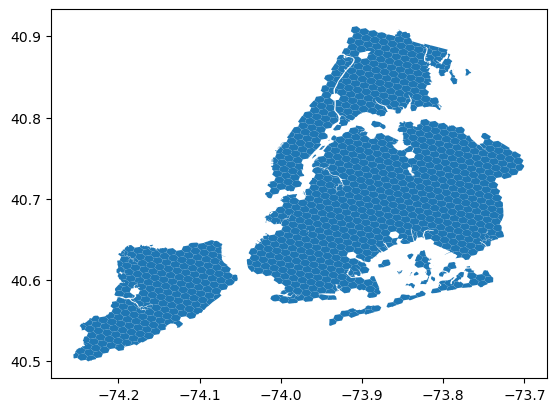

In [41]:
# Plot the geometries
hexagons_gdf.plot()

# Show the plot
plt.show()

In [24]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [47]:
from tqdm import tqdm
from shapely.geometry import Point
from rtree import index

# Create a spatial index for hexagons
idx = index.Index()
for _, hexagon in tqdm(hexagons_gdf.iterrows(), total=len(hexagons_gdf)):
    idx.insert(hexagon.name, hexagon.geometry.bounds)

# Create a dictionary to store nodes assigned to each hexagon
nodes_in_hex = {hex_id: [] for hex_id in hexagons_gdf['hex_id']}

# Determine which hexagon each node belongs to based on its coordinates using the spatial index
for node, (x, y) in tqdm(node_positions.items(), total=len(node_positions)):
    point = Point(x, y)
    for hex_id in idx.intersection((x, y)):
        hexagon = hexagons_gdf.iloc[hex_id]
        if hexagon.geometry.contains(point):
            nodes_in_hex[hexagon['hex_id']].append(node)
            break

100%|██████████████████████████████████████████████████████████████████████████| 55339/55339 [00:11<00:00, 5029.83it/s]


In [48]:
nodes_in_hex

{'882a106e0dfffff': [42948879,
  42948883,
  42948887,
  42948895,
  42948898,
  42948901,
  42948910,
  42948912,
  42949984,
  42951846,
  42956464,
  42958355,
  42958366,
  42959589,
  42959599,
  42959606,
  42959610,
  42970635,
  42970643,
  42986181,
  42989122,
  42991074,
  42994117,
  42994214,
  42995688,
  42995699,
  42998692,
  43012188,
  43013788,
  43015337,
  43015928,
  482454195,
  2613300614,
  2613300615,
  2613300617,
  3658673952,
  3658673953,
  5448868723,
  5448868724,
  5448868725,
  6605023592,
  6605023593,
  6916932686,
  6916932691],
 '882a106e63fffff': [42949981,
  42949998,
  42951352,
  42951353,
  42951356,
  42951358,
  42951363,
  42951370,
  42951378,
  42951384,
  42951674,
  42951676,
  42954014,
  42954018,
  42958358,
  42965069,
  42965071,
  42965076,
  42965081,
  42971013,
  42971016,
  42974909,
  42980625,
  42980628,
  42980631,
  42989132,
  42989136,
  42989141,
  42989145,
  42989149,
  42989156,
  42989162,
  42989166,
  42989170,


In [26]:
import csv

# Define an empty dictionary to store the data read from the CSV file
node_centrality = {}

# Read data from the CSV file
file_path = r"D:\2024spring\UCB_CYPLAN255_2024\node_centrality.csv"
with open(file_path, 'r', newline='') as f:
    reader = csv.reader(f)
    header = next(reader)  # Skip the header row
    for row in reader:
        node = row[0]
        centrality = float(row[1])  # Assuming centrality is stored as a float
        node_centrality[node] = centrality

# Now, read_node_centrality dictionary contains the data read from the CSV file
print(node_centrality)


{'39076461': 0.017344849064930733, '39076490': 0.015265234439149126, '39076504': 0.0157740230553266, '42421728': 0.014607625715793065, '42421731': 0.014439543472365498, '42421737': 0.014297590757680468, '42421741': 0.014181965768067559, '42421745': 0.013988920679747807, '42421749': 0.01390181810266002, '42421751': 0.014095342087560019, '42421769': 0.013886138990723074, '42421772': 0.013616904877488777, '42421775': 0.013927541116335854, '42421776': 0.01412326945041261, '42421778': 0.014323011478840244, '42421783': 0.015605351936616106, '42421785': 0.015407798399445078, '42421786': 0.015365169414819042, '42421791': 0.015132297202487816, '42421800': 0.013853132862990133, '42421803': 0.013744995933975313, '42421806': 0.01353324069765696, '42421809': 0.01351567522407161, '42421810': 0.013512331120365071, '42421820': 0.013557789901072847, '42421828': 0.016406061396661228, '42421852': 0.015005169115298426, '42421857': 0.01468687921105628, '42421865': 0.014530149195400837, '42421877': 0.015078

In [53]:
# Create a dictionary to store the mean centrality value of nodes in each hexagon
mean_centrality_per_hex = {}

# Calculate the mean centrality value for each hexagon
for hex_id, nodes in tqdm(nodes_in_hex.items(), total=len(nodes_in_hex)):
    centrality_values = [node_centrality[str(node)] for node in nodes if str(node) in node_centrality]
    if centrality_values:  # Check if there are centrality values for the hexagon
        mean_centrality_per_hex[hex_id] = np.mean(centrality_values)
    else:
        mean_centrality_per_hex[hex_id] = None  # Set to None if no centrality values found

# Now, mean_centrality_per_hex contains the mean centrality value for each hexagon


100%|███████████████████████████████████████████████████████████████████████████| 1060/1060 [00:00<00:00, 24002.26it/s]


In [54]:
mean_centrality_per_hex

{'882a106e0dfffff': 0.009830567670874856,
 '882a106e63fffff': 0.009837534556435214,
 '882a106e67fffff': 0.00959306148693719,
 '882a106e47fffff': 0.01013834909813191,
 '882a106e6bfffff': 0.010616119692756778,
 '882a106e61fffff': 0.010332617149236455,
 '882a106e41fffff': 0.010207086534464314,
 '882a106e45fffff': 0.01121566682990474,
 '882a1060b5fffff': 0.009741802007479646,
 '882a106e69fffff': 0.011205326810381874,
 '882a106e49fffff': 0.010426488655646464,
 '882a1060b9fffff': 0.009810897166287805,
 '882a106e4dfffff': 0.010492927205383912,
 '882a1060bdfffff': 0.010172662158607763,
 '882a106193fffff': 0.011233464381824924,
 '882a1060a3fffff': 0.010535213085437624,
 '882a106083fffff': 0.009524144503520723,
 '882a106197fffff': 0.010714068585809209,
 '882a1060a7fffff': 0.011461235856410054,
 '882a106087fffff': 0.009758816720105274,
 '882a10619bfffff': 0.01199707199260245,
 '882a1060abfffff': 0.010462011132957347,
 '882a10608bfffff': 0.009079799649045622,
 '882a106191fffff': 0.0121496610365983

In [56]:
import pandas as pd

# Convert mean_centrality_per_hex dictionary to a DataFrame
df = pd.DataFrame(mean_centrality_per_hex.items(), columns=['hex_id', 'mean_centrality'])

# Save DataFrame to CSV
df.to_csv('mean_centrality_per_hex.csv', index=False)


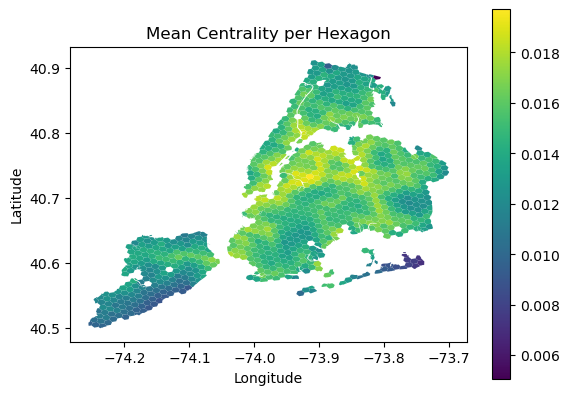

In [55]:
# Merge mean centrality values into hexagons_gdf
hexagons_gdf['mean_centrality'] = hexagons_gdf['hex_id'].map(mean_centrality_per_hex)

# Plot the hexagons with mean centrality values
hexagons_gdf.plot(column='mean_centrality', cmap='viridis', legend=True)
plt.title('Mean Centrality per Hexagon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


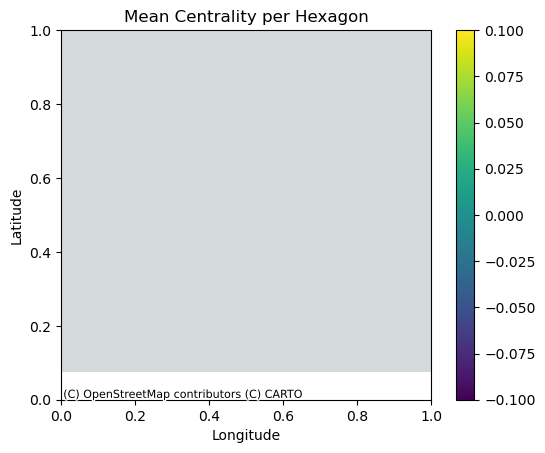

In [29]:
import geopandas as gpd

# Assuming your original data already has a CRS specified, set it to the GeoDataFrame
hexagons_gdf.crs = 'EPSG:4326'  # Assuming your original CRS is EPSG:4326 (WGS84)

# Now you can convert the geometries to EPSG:3857 and plot them
ax = hexagons_gdf.to_crs(epsg=3857).plot(column='mean_centrality', cmap='viridis', legend=True)
cx.add_basemap(ax, crs='epsg:3857', source=cx.providers.CartoDB.PositronNoLabels)
plt.title('Mean Centrality per Hexagon')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [60]:
G2 = ox.graph_from_place("Alameda County, California, USA", network_type="drive",simplify=True)

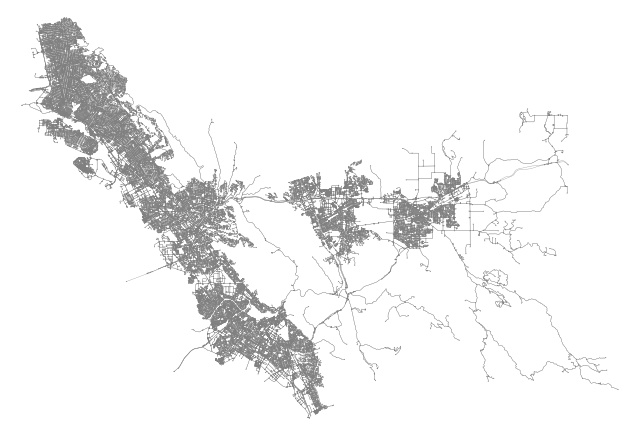

In [64]:
# Plot the graph
fig, ax = ox.plot_graph(G2, node_size=0.5, bgcolor='white', node_color='gray', edge_color="gray", edge_linewidth=0.2)

# Define the length of the scale bar in meters
scale_bar_length = 1000  # Adjust as needed

# Calculate the coordinates for the scale bar
x = ax.get_xlim()[0] + 0.02
y = ax.get_ylim()[0] + 0.02

# Draw the scale bar
ax.plot([x, x + scale_bar_length], [y, y], color='black', linewidth=8)

# Add text for the scale bar length
ax.text(x + scale_bar_length / 2, y - 0.01, f'{scale_bar_length} m', ha='center', fontsize=8)

plt.show()

In [ ]:
# Initialize an empty dictionary to store closeness centrality values
node_centrality2 = {}

# Get the total number of nodes in the graph
total_nodes = len(G2.nodes())

# Iterate over each node in the graph, with progress tracking
for node in tqdm(G2.nodes(), total=total_nodes, desc="Calculating Closeness Centrality"):
    # Calculate the closeness centrality for the current node
    closeness_centrality = nx.closeness_centrality(G2, u=node)
    # Store the result in the dictionary
    node_centrality2[node] = closeness_centrality

Calculating Closeness Centrality:  26%|█████████▍                          | 10912/41627 [12:32:34<40:12:28,  4.71s/it]

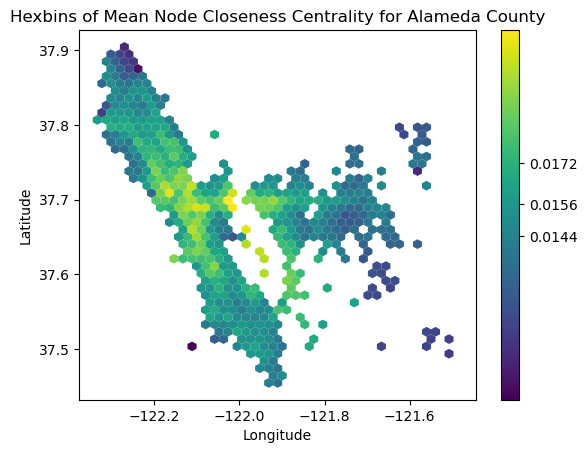

In [59]:
# Step 2: Compute node positions
node_positions2 = {node: (data['x'], data['y']) for node, data in G2.nodes(data=True)}
node_x, node_y = np.array(list(node_positions2.values())).T

# Step 3: Create hexbin plot
hb = plt.hexbin(x=node_x, y=node_y, C=list(node_centrality2.values()), gridsize=40, cmap='viridis', mincnt=1,lw=0)

# Step 4: Compute quantiles of closeness centrality values
quantiles = np.quantile(list(node_centrality2.values()), [0, 0.25, 0.5, 0.75, 1])

# Step 5: Create colorbar with original centrality values as labels
cbar = plt.colorbar(hb, ticks=quantiles)
cbar.ax.set_yticklabels([f'{q:.4f}' for q in quantiles])

# Step 6: Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbins of Mean Node Closeness Centrality for Alameda County')

# Step 7: Show the plot
plt.show()

In [73]:
crs = G1.graph['crs']
print("CRS of G1:", crs)

CRS of G1: epsg:4326


In [60]:
import contextily as cx

In [76]:
G1p = ox.project_graph(G1, to_crs='epsg:3857')

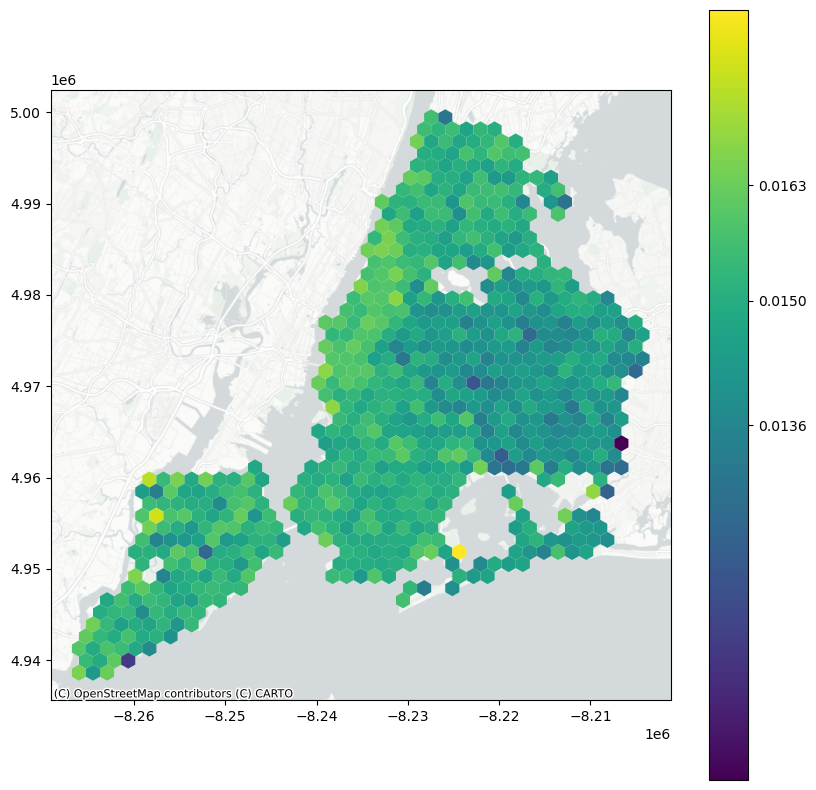

In [82]:
# Step 2: Compute node positions
node_positions = {node: (data['x'], data['y']) for node, data in G1p.nodes(data=True)}
node_x, node_y = np.array(list(node_positions.values())).T

# Step 3: Create hexbin plot
fig, ax = plt.subplots(figsize=(10, 10))
hb = ax.hexbin(x=node_x, y=node_y, C=list(node_centrality.values()), gridsize=40, cmap='viridis', mincnt=1,lw=0)

# Step 4: Compute quantiles of closeness centrality values
quantiles = np.quantile(list(node_centrality.values()), [0, 0.25, 0.5, 0.75, 1])

# Step 5: Create colorbar with original centrality values as labels
cbar = plt.colorbar(hb, ticks=quantiles)
cbar.ax.set_yticklabels([f'{q:.4f}' for q in quantiles])


# Step 8: Add basemap using Contextily
cx.add_basemap(ax=ax, crs='epsg:3857', source=cx.providers.CartoDB.PositronNoLabels)

# Step 9: Show the plot
plt.show()

In [83]:
G2 = ox.graph_from_place("Alameda County, California, USA", network_type="drive",simplify=True)
G2p = ox.project_graph(G2, to_crs='epsg:3857')

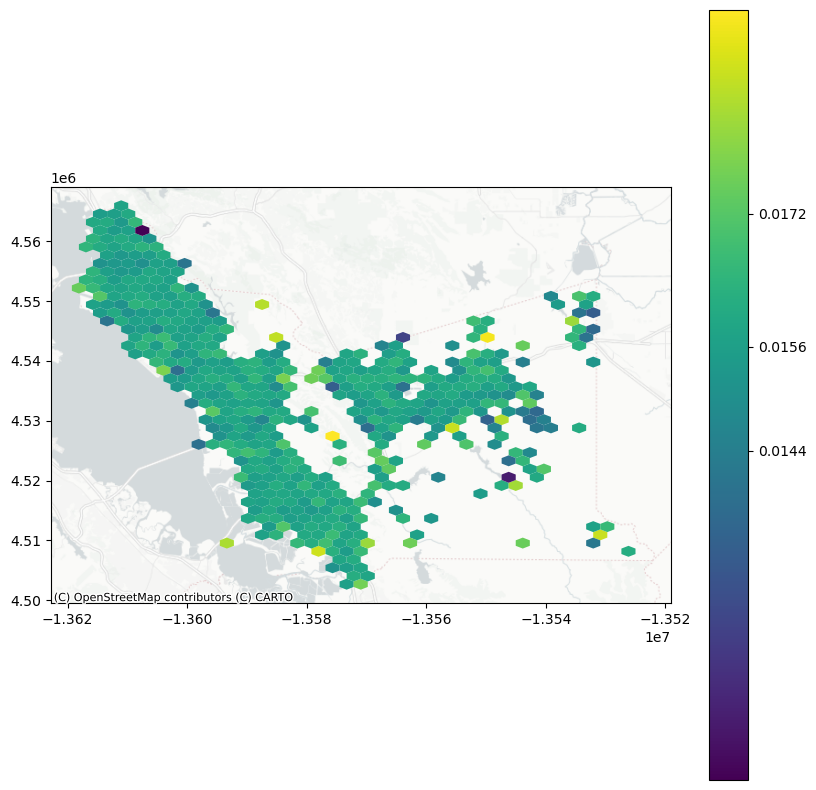

In [87]:
# Step 2: Compute node positions
node_positions2 = {node: (data['x'], data['y']) for node, data in G2p.nodes(data=True)}
node_x, node_y = np.array(list(node_positions2.values())).T

# Step 3: Create hexbin plot
fig, ax = plt.subplots(figsize=(10, 10))
hb = ax.hexbin(x=node_x, y=node_y, C=list(node_centrality2.values()), gridsize=40, cmap='viridis', mincnt=1,lw=0)

# Step 4: Compute quantiles of closeness centrality values
quantiles = np.quantile(list(node_centrality2.values()), [0, 0.25, 0.5, 0.75, 1])

# Step 5: Create colorbar with original centrality values as labels
cbar = plt.colorbar(hb, ticks=quantiles)
cbar.ax.set_yticklabels([f'{q:.4f}' for q in quantiles])


# Step 8: Add basemap using Contextily
cx.add_basemap(ax=ax, crs='epsg:3857', source=cx.providers.CartoDB.PositronNoLabels)

# Step 9: Show the plot
plt.show()

In [12]:
G2 = ox.graph_from_place("Alameda County, California, USA", network_type="drive",simplify=True)

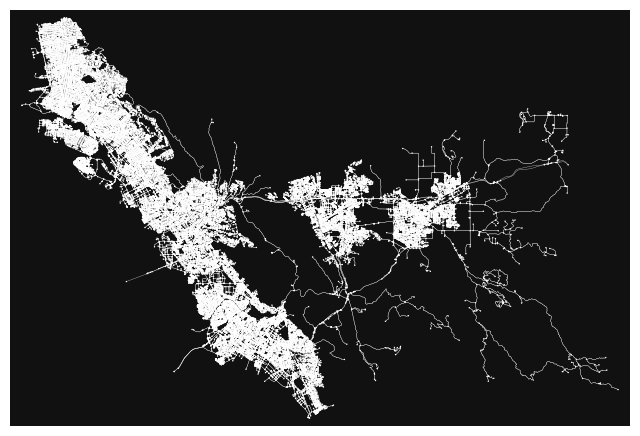

In [13]:
fig, ax = ox.plot_graph(G2,node_size=1, node_color='white', edge_color="white", edge_linewidth=0.2)

In [1]:
G2 = ox.graph_from_place("Alameda County, California, USA", network_type="drive",simplify=True)
fig, ax = plt.subplots(figsize=(10, 10))
cx.add_basemap(ax, crs=G2.graph['crs'], source=cx.providers.CartoDB.PositronNoLabels, zoom=10)
plt.show()

NameError: name 'ox' is not defined

In [ ]:
G3 = ox.graph_from_place("San Mateo County, California, USA", network_type="drive",simplify=True)
fig, ax = ox.plot_graph(G3,node_size=1, node_color='white', edge_color="white", edge_linewidth=0.2)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
cx.add_basemap(ax, crs=G3.graph['crs'], source=cx.providers.CartoDB.PositronNoLabels, zoom=10)
plt.show()

In [ ]:
node_centrality = nx.closeness_centrality(G1)

In [ ]:
place_names = ['San Francisco County, California, USA', 
               'San Mateo County, California, USA',
               'Alameda County, California, USA',
               'Contra Costa County, California, USA',
               'Marin County, CA, USA']

bay = osmnx.geocode_to_gdf(place_names)

In [2]:
import pandas as pd
df_centra = pd.read_csv('mean_centrality_per_hex.csv')

In [3]:
df_st = pd.read_csv('hexagons_street_density.csv')

In [4]:
df_k = pd.read_csv('mean_degree_per_hex.csv')

In [7]:
df_centra.head()

hex_id  mean_centrality
0  882a106e0dfffff         0.009831
1  882a106e63fffff         0.009838
2  882a106e67fffff         0.009593
3  882a106e47fffff         0.010138
4  882a106e6bfffff         0.010616

In [8]:
merged_df = df_centra.merge(df_st, on='hex_id', suffixes=('_df_centra', '_df_st')).merge(df_k, on='hex_id')

In [9]:
merged_df.head()

hex_id  mean_centrality  street_density_km  Mean_Degree
0  882a106e0dfffff         0.009831       2.156995e+09     5.204545
1  882a106e63fffff         0.009838       2.356213e+09     5.750000
2  882a106e67fffff         0.009593       2.325496e+09     5.214286
3  882a106e47fffff         0.010138       1.058723e+09     4.466667
4  882a106e6bfffff         0.010616       2.343848e+09     4.666667

In [11]:
correlation_matrix = merged_df[['mean_centrality', 'Mean_Degree', 'street_density_km']].corr()

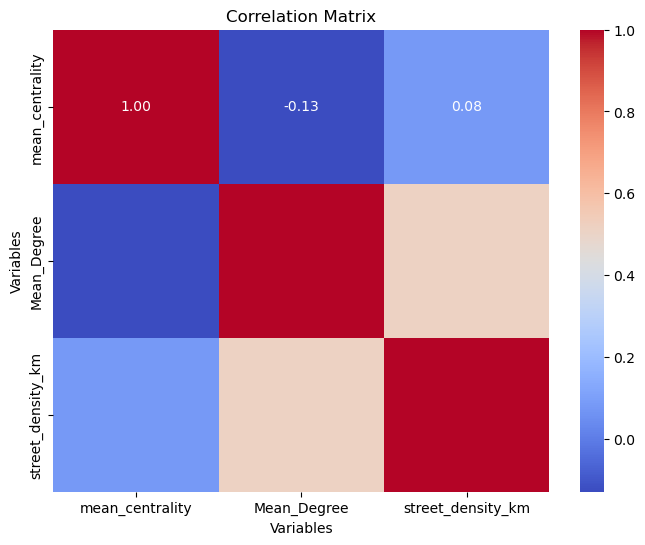

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(8, 6))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title and labels
plt.title('Correlation Matrix')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()


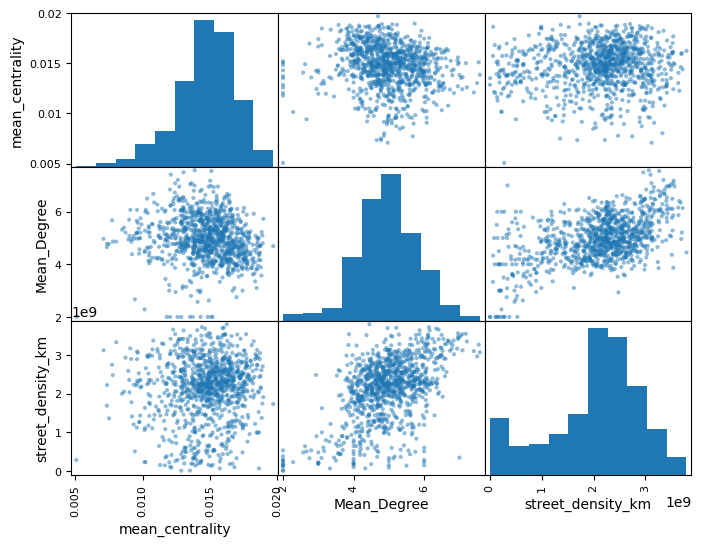

In [13]:
pd.plotting.scatter_matrix(merged_df[['mean_centrality', 'Mean_Degree', 'street_density_km']], figsize=(8, 6))
plt.show()


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


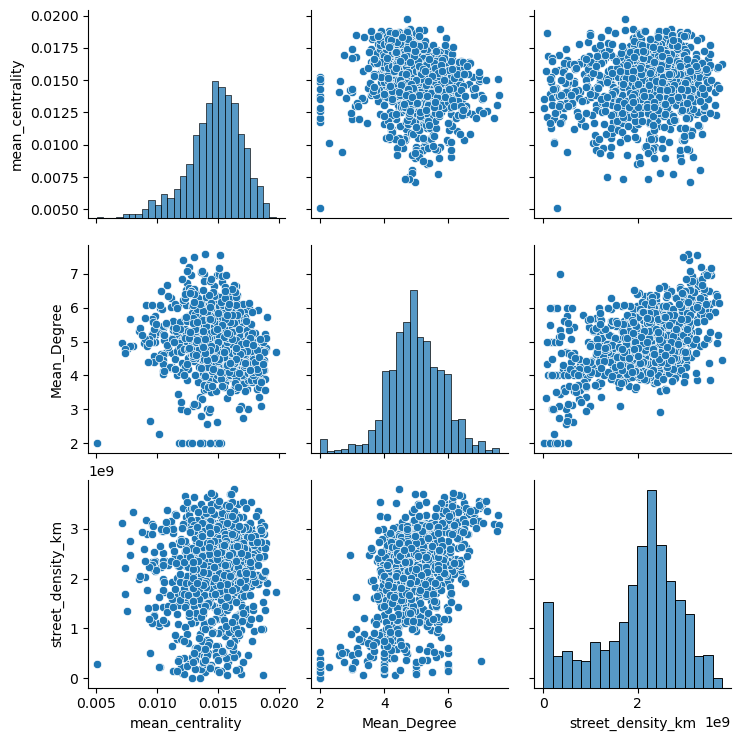

In [14]:
sns.pairplot(merged_df[['mean_centrality', 'Mean_Degree', 'street_density_km']])
plt.show()

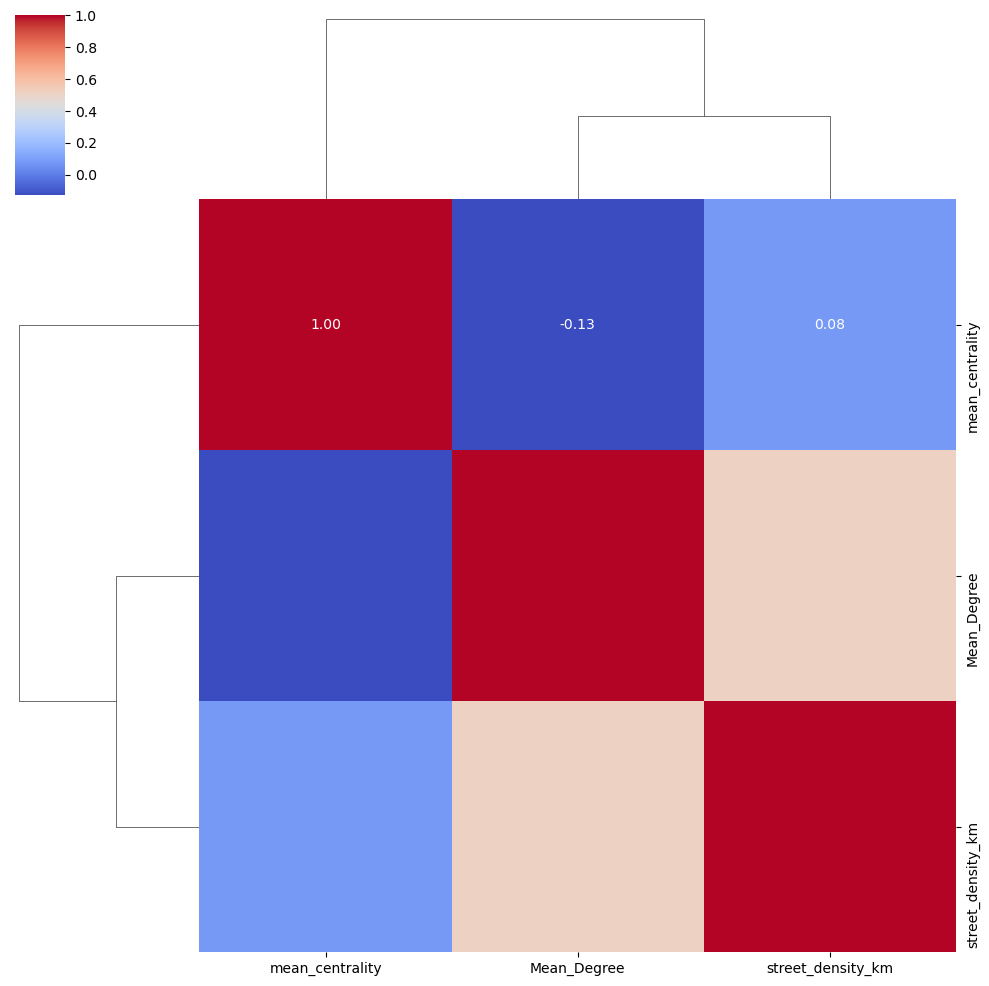

In [15]:
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
